In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn import metrics
%matplotlib inline

mlflow.set_experiment("RegressionSal")

In [2]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
#dataset

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [4]:
# parmeters for model
alpha = 0.5
l1_ratio = 0.5
random_state=40

Model Accuracy: 97.18689068948844


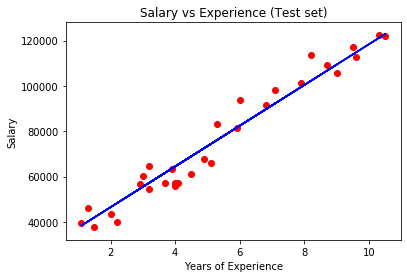

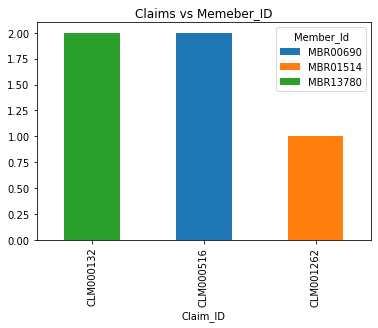

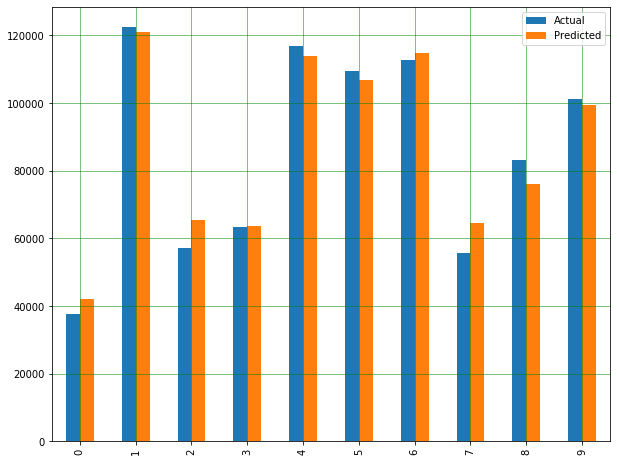

In [76]:
with mlflow.start_run():
    # Fitting Simple Linear Regression to the Training set
    #from sklearn.linear_model import LinearRegression
    
    #regressor = LinearRegression()
    #regressor.fit(X_train, y_train)
    
    from sklearn.linear_model import ElasticNet
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=random_state)
    lr.fit(X_train, y_train)
    
    # Predicting the Test set results
    #y_pred = regressor.predict(X_test)
    y_pred = lr.predict(X_test)
    #np.savetxt("result.csv", y_pred, delimiter=",")
    
    # Visualising the Training set results
    plt.scatter(X_train, y_train, color = 'red')
    plt.plot(X_train, lr.predict(X_train), color = 'blue')
    plt.title('Salary vs Experience (Training set)')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.savefig('Training.png')
    #plt.close('Training.png')
    #plt.show()
    
    # Visualising the Test set results
    plt.scatter(X_test, y_test, color = 'red')
    plt.plot(X_train, lr.predict(X_train), color = 'blue')
    plt.title('Salary vs Experience (Test set)')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.savefig('Test.png')
    #plt.close('Test.png')
    #plt.show()
    
    # Druid Integration with Jupyter and Mlflow
    from sqlalchemy import *
    from sqlalchemy.engine import create_engine
    from sqlalchemy.schema import *
    import pandas as pd

    #Chnage host and port for Druid db
    engine = create_engine("druid://18.218.21.17:3888/druid/v2/sql/")
    places = Table('claims', MetaData(bind=engine), autoload=True)
    df = pd.read_sql(select([places.c.Claim_ID, places.c.Member_Id]), con=engine)
    count = pd.read_sql(select([func.count()]).select_from(places), con=engine)
    count = count.values[0]
    count = count.item()
    
    #Driud Data visualisation
    df = df.head()
    df.groupby(['Claim_ID','Member_Id']).size().unstack().plot(kind='bar',stacked=True)
    plt.title('Claims vs Memeber_ID')
    plt.savefig('Druid.png')
    #plt.show()
    
    # Logging Metrix and parameter values in mlflow
    mlflow.log_metric("MAE", metrics.mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("MSE", metrics.mean_squared_error(y_test, y_pred))
    mlflow.log_metric("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("r2", metrics.r2_score(y_test, y_pred))
    mlflow.log_metric("Druid", count)
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1_ratio)
    
    # Predicted and actual values
    df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_pred.to_csv('result.txt', encoding='utf-8', index=False)
    
    # Plot predicted and actual values on bar graph
    df_pred.plot(kind='bar',figsize=(10,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.savefig('Prediction.png')
    #plt.close('Prediction.png')
    #plt.show()
    
    # These artifacts will be shown in artifact section in mlflow
    mlflow.log_artifact("Salary_Data.csv")
    mlflow.log_artifact("result.txt")
    mlflow.log_artifact("Training.png")
    mlflow.log_artifact("Test.png")
    mlflow.log_artifact("Prediction.png")
    mlflow.log_artifact("Druid.png")
    
    # Model Accuracy
    accuracy = lr.score(X_test,y_test)
    print("Model Accuracy:",accuracy*100)
    mlflow.log_param("accuracy", accuracy)
    
    # Model log and environment variables
    mlflow.sklearn.log_model(lr, "model")

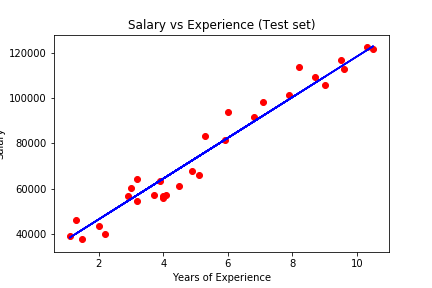

In [7]:
from IPython.display import Image
Image(filename='Training.png')
Image(filename='Test.png')

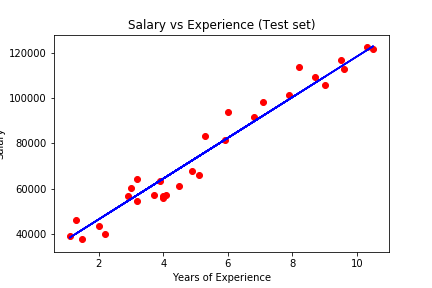

In [9]:
from IPython.display import Image
Image(filename='Test.png')

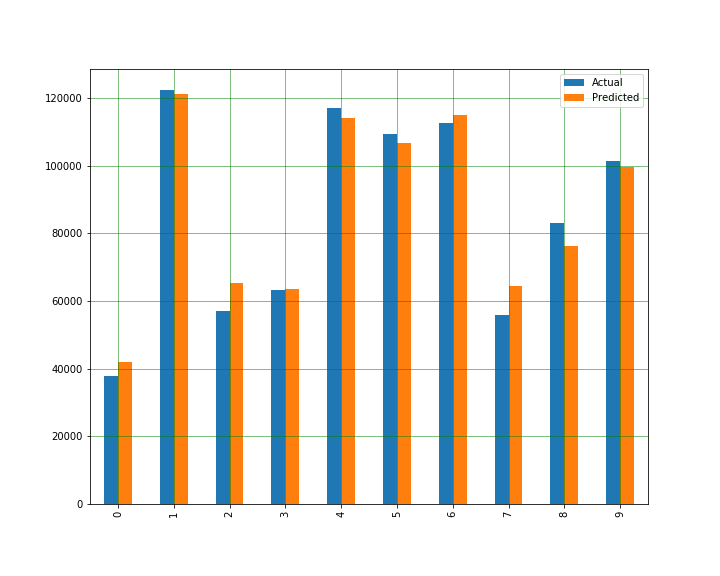

In [8]:
from IPython.display import Image
Image(filename='Prediction.png')

In [ ]:
mlflow.search_runs()

In [ ]:
run_id1 = "b3228b3a4a6d45e89e6ce98a3453a111"
model_uri = "file:///Users/dhananjay/Desktop/Machine%20Learning/Part%202%20-%20Regression/Section%204%20-%20Simple%20Linear%20Regression/mlruns/3/b3228b3a4a6d45e89e6ce98a3453a111/artifacts/model"

In [ ]:
model = mlflow.sklearn.load_model(model_uri = model_uri)

In [ ]:
model.get_params()

In [ ]:
#import numpy as np
#arr = np.array([[20]])
#model.predict(arr)
model.predict(X_test)

In [10]:
#!mlflow ui
#mlflow.end_run()

In [73]:
# Druid Integration with Jupyter and Mlflow
from sqlalchemy import *
from sqlalchemy.engine import create_engine
from sqlalchemy.schema import *
import pandas as pd

#Chnage host and port for Druid db
engine = create_engine("druid://18.218.21.17:3888/druid/v2/sql/")
places = Table('claims', MetaData(bind=engine), autoload=True)
df = pd.read_sql(select([places.c.Claim_ID, places.c.Member_Id]), con=engine)
#count = print("Record_Count:",select([func.count()]).select_from(places).scalar())

count = pd.read_sql(select([func.count()]), con=engine) # columns='Claim_ID')

count = pd.read_sql(select([func.count()]).select_from(places), con=engine)

print(count)

   count_1
0    61150


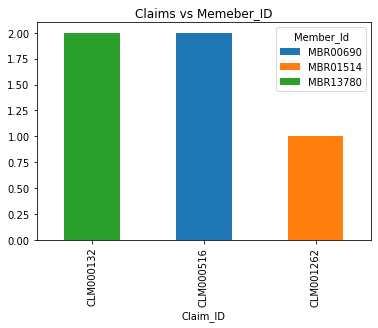

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline 

df = df.head()

df.groupby(['Claim_ID','Member_Id']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Claims vs Memeber_ID')
plt.show()